# Data Analysis

## Import Library

In [145]:
# Data manipulation
import numpy as np
import pandas as pd
import datetime as dt

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [146]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [147]:
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)

NumPy 1.23.5
Pandas 2.0.1
Matplotlib 3.7.1
Seaborn 0.12.2


## Read Dataset

In [148]:
data = pd.ExcelFile('./Dataset/Data_ShieldGruppe.xlsx')
print(pd.ExcelFile(data).sheet_names)

['Front Cover', 'DATA TABLE ->', 'Claims', 'LOOKUP TABLE ->', 'Date Lookup', 'Contracts Lookup']


In [149]:
# Read each data separately
claims = pd.read_excel(data, header=0, sheet_name='Claims')
contracts = pd.read_excel(data, header=0, sheet_name='Contracts Lookup')
date = pd.read_excel(data, header=0, sheet_name='Date Lookup')

In [150]:
# Define function
def missing_values(df):
    total = df.isna().sum()
    percent = round((df.isna().sum() / df.isna().count() * 100), 2)
    na = pd.concat([total, percent], axis=1, keys=['Total', 'Percentage (%)'])
    na = na[na['Percentage (%)'] > 0]
    na.reset_index(inplace=True)
    na.rename(columns={'index': 'Feature Name'}, inplace=True)
    return na

def unique_values(df):
    values = {'Feature Name': [], 'Unique Classes': []}
    for col in df.columns:
        values['Feature Name'].append(col)
        values['Unique Classes'].append(df[col].unique())
    return pd.DataFrame(values)

def categorical_distribution(cat):
    count = cat.describe().loc['count']
    top_freq = cat.describe().loc['freq']

    percentage = (top_freq / count) * 100
    percentage = percentage.astype(float)

    result = pd.concat([cat.describe().loc['top'], percentage], axis=1)
    result.columns = ['Top most frequent class', 'Percentage (%)']
    
    return result.round(2).reset_index().rename(columns={'index': 'Feature Name'})

### Data Table: Claims

In [151]:
claims.shape

(4923, 5)

In [152]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4923 entries, 0 to 4922
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Policy No.      4923 non-null   object        
 1   Claim No.       4923 non-null   object        
 2   Payment Date    4923 non-null   datetime64[ns]
 3   Payment Amount  4923 non-null   float64       
 4   Currency        4923 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 192.4+ KB


In [153]:
claims.sample(5)

,Policy No.,Claim No.,Payment Date,Payment Amount,Currency
1475,P4579002-34,01-323-11874-18-1,2018-02-21,2094.95,CHF
2364,P45790P4-36,01-323-11065-18-6,2018-01-31,2086.70,CHF
847,P4578924-21,01-323-18617-18-1,2018-09-03,202.85,CHF
4100,P4579002-34,01-323-14823-17-1,2017-06-06,300.25,CHF
2697,P45790P4-36,01-323-16638-18-2,2018-07-12,528.25,CHF


In [154]:
claims.duplicated().sum()

0

In [155]:
claims.isna().sum().sum()

0

In [156]:
claims.nunique()

Policy No.          34
Claim No.         4923
Payment Date       952
Payment Amount    4299
Currency             1
dtype: int64

In [157]:
unique_values(claims)

,Feature Name,Unique Classes
0,Policy No.,"[P4578894-16, P4578900-17, P4578906-18, P45789..."
1,Claim No.,"[01-323-10165-18-8, 01-323-10287-18-9, 01-323-..."
2,Payment Date,"[2018-01-04 00:00:00, 2018-01-10 00:00:00, 201..."
3,Payment Amount,"[167.9, 1565.7, 1117.85, 505.45, 536.85, 689.8..."
4,Currency,[CHF]


In [158]:
claims.describe(include='all')

,Policy No.,Claim No.,Payment Date,Payment Amount,Currency
count,4923,4923,4923,4923.000000,4923
unique,34,4923,NaN,NaN,1
top,P4579002-34,01-323-10165-18-8,NaN,NaN,CHF
freq,903,1,NaN,NaN,4923
mean,NaN,NaN,2017-12-03 02:30:03.290676480,4760.401549,NaN
min,NaN,NaN,2010-05-17 00:00:00,-39206.550000,NaN
25%,NaN,NaN,2017-10-02 00:00:00,228.525000,NaN
50%,NaN,NaN,2018-02-02 00:00:00,656.950000,NaN
75%,NaN,NaN,2018-06-04 00:00:00,2554.675000,NaN
max,NaN,NaN,2018-11-18 00:00:00,691979.986004,NaN


In [159]:
categorical_distribution(claims.select_dtypes(include=['object']))

,Feature Name,Top most frequent class,Percentage (%)
0,Policy No.,P4579002-34,18.34
1,Claim No.,01-323-10165-18-8,0.02
2,Currency,CHF,100.00


### Lookup Table: Date Lookup

In [160]:
date.shape

(3287, 7)

In [161]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Payment Date       3287 non-null   datetime64[ns]
 1   Year               3287 non-null   int64         
 2   Year - Quarter     3287 non-null   object        
 3   Quarter            3287 non-null   object        
 4   Calendar Month ID  3287 non-null   object        
 5   Month_short        3287 non-null   object        
 6   Month_long         3287 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 179.9+ KB


In [162]:
date.sample(5)

,Payment Date,Year,Year - Quarter,Quarter,Calendar Month ID,Month_short,Month_long
2432,2016-08-29,2016,2016 - Q3,Q3,M08,Aug,August
1707,2014-09-04,2014,2014 - Q3,Q3,M09,Sep,September
2629,2017-03-14,2017,2017 - Q1,Q1,M03,Mar,March
2477,2016-10-13,2016,2016 - Q4,Q4,M10,Oct,October
2596,2017-02-09,2017,2017 - Q1,Q1,M02,Feb,February


In [163]:
date.duplicated().sum()

0

In [164]:
date.isna().sum().sum()

0

In [165]:
date.nunique()

Payment Date         3287
Year                    9
Year - Quarter         36
Quarter                 4
Calendar Month ID      12
Month_short            12
Month_long             12
dtype: int64

In [166]:
unique_values(date)

,Feature Name,Unique Classes
0,Payment Date,"[2010-01-01 00:00:00, 2010-01-02 00:00:00, 201..."
1,Year,"[2010, 2011, 2012, 2013, 2014, 2015, 2016, 201..."
2,Year - Quarter,"[2010 - Q1, 2010 - Q2, 2010 - Q3, 2010 - Q4, 2..."
3,Quarter,"[Q1, Q2, Q3, Q4]"
4,Calendar Month ID,"[M01, M02, M03, M04, M05, M06, M07, M08, M09, ..."
5,Month_short,"[Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, ..."
6,Month_long,"[January, February, March, April, May, June, J..."


In [167]:
date.describe(include='all')

,Payment Date,Year,Year - Quarter,Quarter,Calendar Month ID,Month_short,Month_long
count,3287,3287.000000,3287,3287,3287,3287,3287
unique,NaN,NaN,36,4,12,12,12
top,NaN,NaN,2014 - Q3,Q3,M01,Jan,January
freq,NaN,NaN,92,828,279,279,279
mean,2014-07-02 00:00:00,2014.000000,NaN,NaN,NaN,NaN,NaN
min,2010-01-01 00:00:00,2010.000000,NaN,NaN,NaN,NaN,NaN
25%,2012-04-01 12:00:00,2012.000000,NaN,NaN,NaN,NaN,NaN
50%,2014-07-02 00:00:00,2014.000000,NaN,NaN,NaN,NaN,NaN
75%,2016-09-30 12:00:00,2016.000000,NaN,NaN,NaN,NaN,NaN
max,2018-12-31 00:00:00,2018.000000,NaN,NaN,NaN,NaN,NaN


In [168]:
categorical_distribution(date.select_dtypes(include=['object']))

,Feature Name,Top most frequent class,Percentage (%)
0,Year - Quarter,2014 - Q3,2.80
1,Quarter,Q3,25.19
2,Calendar Month ID,M01,8.49
3,Month_short,Jan,8.49
4,Month_long,January,8.49


### Lookup Table: Contracts Lookup

In [169]:
contracts.shape

(34, 15)

In [170]:
contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Policy No.           34 non-null     object        
 1   Contract Start Date  34 non-null     datetime64[ns]
 2   Contract End Date    34 non-null     datetime64[ns]
 3   Company              30 non-null     object        
 4   Company ID           34 non-null     object        
 5   Underwriter          30 non-null     object        
 6   Policy Holder        34 non-null     object        
 7   Segment              34 non-null     object        
 8   Street               34 non-null     object        
 9   Street No.           34 non-null     object        
 10  Street with No.      34 non-null     object        
 11  ZIP                  34 non-null     int64         
 12  City                 34 non-null     object        
 13  Country              34 non-null     

In [171]:
contracts.sample(5)

,Policy No.,Contract Start Date,Contract End Date,Company,Company ID,Underwriter,Policy Holder,Segment,Street,Street No.,Street with No.,ZIP,City,Country,Canton
28,P4578948-25,2006-01-07,2016-01-07,World,C-000029,"Giovannini, Silvia",World,Corporate,Hagenbuchrain,26a,Hagenbuchrain 26a,8702,Herrliberg,Switzerland,Zurich
17,P4579002-34,2005-09-09,2015-09-09,Tree,C-000018,"Michelet, Jean",Tree,Corporate,Rautistrasse,6,Rautistrasse 6,7458,Preda,Switzerland,Grisons
6,P4578978-30,2005-10-16,2015-10-16,Chocolate,C-000007,"Lipp, Silvia",Chocolate,Corporate,Fellenbergweg,12,Fellenbergweg 12,6370,Seelisberg,Switzerland,Nidwalden
24,P4579056-43,2007-03-12,2017-03-12,Inline,C-000030,"Schweizer, Nicole",Inline,Corporate,Flüelastrasse,31b,Flüelastrasse 31b,4025,Biberist,Switzerland,Basel City
14,P45790P4-36,2009-02-09,2019-02-09,Spice,C-000015,"Ott, Benjamin",Spice,Corporate,Langgrütstrasse,155,Langgrütstrasse 155,8005,Zurich,Switzerland,Zurich


In [172]:
contracts.duplicated().sum()

0

In [173]:
contracts.isna().sum().sum()

8

In [174]:
missing_values(contracts)

,Feature Name,Total,Percentage (%)
0,Company,4,11.76
1,Underwriter,4,11.76


In [175]:
# Fill missing values
contracts['Company'].fillna(contracts['Segment'], inplace=True)
contracts['Underwriter'].fillna(contracts['Underwriter'].mode().iloc[0], inplace=True)

# Recheck
contracts.isna().sum().sum()

0

In [176]:
contracts.nunique()

Policy No.             34
Contract Start Date    33
Contract End Date      33
Company                31
Company ID             31
Underwriter            30
Policy Holder          34
Segment                 2
Street                 34
Street No.             33
Street with No.        34
ZIP                    34
City                   31
Country                 1
Canton                 16
dtype: int64

In [177]:
unique_values(contracts)

,Feature Name,Unique Classes
0,Policy No.,"[P4578954-26, P4578966-28, P45789P8-20, P45789..."
1,Contract Start Date,"[2008-07-05 00:00:00, 2011-07-28 00:00:00, 201..."
2,Contract End Date,"[2018-07-05 00:00:00, 2021-07-28 00:00:00, 202..."
3,Company,"[Fire, Sun, Blue, Pool, Water, Ice, Chocolate,..."
4,Company ID,"[C-000002, C-000001, C-000003, C-000004, C-000..."
5,Underwriter,"[Hinnen, Martin, Hunziker, Cecilia, D'Antonino..."
6,Policy Holder,"[Fire, Sun, Blue, Pool, Water, Ice, Chocolate,..."
7,Segment,"[Corporate, Retail]"
8,Street,"[Freilagerstrasse, Anemonenstrasse, Wydäckerri..."
9,Street No.,"[28, 37, 80, 78, 36, 56, 12, 3, 17, 200, 2, 51..."


In [178]:
contracts.describe(include='all')

,Policy No.,Contract Start Date,Contract End Date,Company,Company ID,Underwriter,Policy Holder,Segment,Street,Street No.,Street with No.,ZIP,City,Country,Canton
count,34,34,34,34,34,34,34,34,34,34.0,34,34.000000,34,34,34
unique,34,NaN,NaN,31,31,30,34,2,34,33.0,34,NaN,31,1,16
top,P4578954-26,NaN,NaN,Retail,C-000024,"Avila, Beatrice",Fire,Corporate,Freilagerstrasse,17.0,Freilagerstrasse 28,NaN,Zurich,Switzerland,Zurich
freq,1,NaN,NaN,4,2,5,1,30,1,2.0,1,NaN,4,34,7
mean,NaN,2008-06-19 02:49:24.705882368,2018-06-19 12:42:21.176470528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6443.764706,NaN,NaN,NaN
min,NaN,2005-05-23 00:00:00,2015-05-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1934.000000,NaN,NaN,NaN
25%,NaN,2006-05-16 18:00:00,2016-05-16 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5484.750000,NaN,NaN,NaN
50%,NaN,2008-03-10 12:00:00,2018-03-10 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6373.500000,NaN,NaN,NaN
75%,NaN,2010-11-14 06:00:00,2020-11-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8035.750000,NaN,NaN,NaN
max,NaN,2012-07-10 00:00:00,2022-07-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9216.000000,NaN,NaN,NaN


In [179]:
categorical_distribution(contracts.select_dtypes(include=['object']))

,Feature Name,Top most frequent class,Percentage (%)
0,Policy No.,P4578954-26,2.94
1,Company,Retail,11.76
2,Company ID,C-000024,5.88
3,Underwriter,"Avila, Beatrice",14.71
4,Policy Holder,Fire,2.94
5,Segment,Corporate,88.24
6,Street,Freilagerstrasse,2.94
7,Street No.,17,5.88
8,Street with No.,Freilagerstrasse 28,2.94
9,City,Zurich,11.76


# Digital Assurance

In [180]:
sword_ag_claims = contracts[contracts['Policy Holder'].str.contains('Sworde AG')]
sword_ag_claims = sword_ag_claims.merge(claims, on='Policy No.')
sword_ag_claims = sword_ag_claims.merge(date, on='Payment Date')

print('Relationships and Claims for/by Sworde AG:')
sword_ag_claims_sorted = sword_ag_claims.sort_values('Payment Date').reset_index(drop=True)
sword_ag_claims_sorted

Relationships and Claims for/by Sworde AG:


,Policy No.,Contract Start Date,Contract End Date,Company,Company ID,Underwriter,Policy Holder,Segment,Street,Street No.,Street with No.,ZIP,City,Country,Canton,Claim No.,Payment Date,Payment Amount,Currency,Year,Year - Quarter,Quarter,Calendar Month ID,Month_short,Month_long
0,P4579044-41,2011-07-01,2021-07-01,Sword,C-000025,"Schmitz, Thomas",Sworde AG,Corporate,Leonhardstrasse,1c,Leonhardstrasse 1c,5432,Neuenhof,Switzerland,Aargau,01-723-15339-18-1,2016-06-24,4999.0,CHF,2016,2016 - Q2,Q2,M06,Jun,June
1,P4579044-41,2011-07-01,2021-07-01,Sword,C-000025,"Schmitz, Thomas",Sworde AG,Corporate,Leonhardstrasse,1c,Leonhardstrasse 1c,5432,Neuenhof,Switzerland,Aargau,01-723-18339-16-7,2016-08-15,4999.0,CHF,2016,2016 - Q3,Q3,M08,Aug,August
2,P4579044-41,2011-07-01,2021-07-01,Sword,C-000025,"Schmitz, Thomas",Sworde AG,Corporate,Leonhardstrasse,1c,Leonhardstrasse 1c,5432,Neuenhof,Switzerland,Aargau,01-723-14312-17-7,2017-05-04,4999.0,CHF,2017,2017 - Q2,Q2,M05,May,May
3,P4579044-41,2011-07-01,2021-07-01,Sword,C-000025,"Schmitz, Thomas",Sworde AG,Corporate,Leonhardstrasse,1c,Leonhardstrasse 1c,5432,Neuenhof,Switzerland,Aargau,01-723-17325-17-6,2017-06-01,4999.0,CHF,2017,2017 - Q2,Q2,M06,Jun,June
4,P4579044-41,2011-07-01,2021-07-01,Sword,C-000025,"Schmitz, Thomas",Sworde AG,Corporate,Leonhardstrasse,1c,Leonhardstrasse 1c,5432,Neuenhof,Switzerland,Aargau,01-723-19630-17-1,2017-06-08,4999.0,CHF,2017,2017 - Q2,Q2,M06,Jun,June
5,P4579044-41,2011-07-01,2021-07-01,Sword,C-000025,"Schmitz, Thomas",Sworde AG,Corporate,Leonhardstrasse,1c,Leonhardstrasse 1c,5432,Neuenhof,Switzerland,Aargau,01-723-19636-17-7,2017-06-29,4999.0,CHF,2017,2017 - Q2,Q2,M06,Jun,June
6,P4579044-41,2011-07-01,2021-07-01,Sword,C-000025,"Schmitz, Thomas",Sworde AG,Corporate,Leonhardstrasse,1c,Leonhardstrasse 1c,5432,Neuenhof,Switzerland,Aargau,01-723-16656-17-8,2017-07-09,4999.0,CHF,2017,2017 - Q3,Q3,M07,Jul,July
7,P4579044-41,2011-07-01,2021-07-01,Sword,C-000025,"Schmitz, Thomas",Sworde AG,Corporate,Leonhardstrasse,1c,Leonhardstrasse 1c,5432,Neuenhof,Switzerland,Aargau,01-723-19633-17-4,2017-09-29,4999.0,CHF,2017,2017 - Q3,Q3,M09,Sep,September
8,P4579044-41,2011-07-01,2021-07-01,Sword,C-000025,"Schmitz, Thomas",Sworde AG,Corporate,Leonhardstrasse,1c,Leonhardstrasse 1c,5432,Neuenhof,Switzerland,Aargau,01-723-20959-17-0,2017-11-02,4999.0,CHF,2017,2017 - Q4,Q4,M11,Nov,November
9,P4579044-41,2011-07-01,2021-07-01,Sword,C-000025,"Schmitz, Thomas",Sworde AG,Corporate,Leonhardstrasse,1c,Leonhardstrasse 1c,5432,Neuenhof,Switzerland,Aargau,01-723-19843-17-5,2017-11-04,4999.0,CHF,2017,2017 - Q4,Q4,M11,Nov,November


🔎 Insight
- `Sword AG` made 22 claims between 2016 and 2018.
- `Thomas Schmitz`, a member of ShieldGruppe Management, is an underwriter for `Sword AG`.

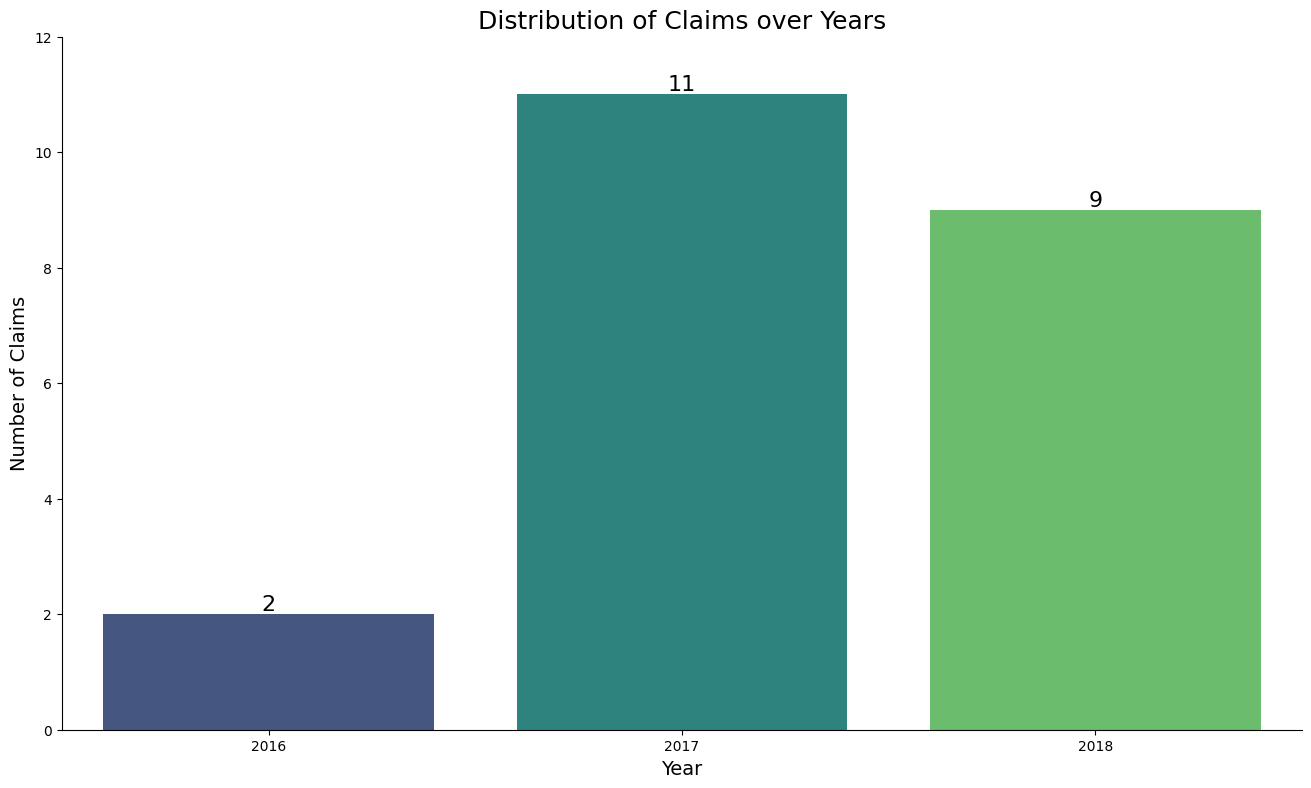

In [181]:
fig, ax = plt.subplots(figsize=(16, 9))

sns.countplot(x='Year', data=sword_ag_claims_sorted, palette='viridis')
sns.despine()

plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Claims', fontsize=14)
plt.ylim(0, 12)
plt.title('Distribution of Claims over Years', fontsize=18)
plt.bar_label(ax.containers[0], fmt='%.0f', fontsize=16)

plt.show()

# Export the Dataset

In [182]:
# Export dataset to a xlsx file
# sword_ag_claims_sorted.to_excel('SwordAG_Claims.xlsx', index=False)